In [1]:
import newt
import pandas as pd

(CVXPY) Jan 08 10:11:25 AM: Encountered unexpected exception importing solver GLOP:
RuntimeError('Unrecognized new version of ortools (9.11.4210). Expected < 9.8.0. Please open a feature request on cvxpy to enable support for this version.')
(CVXPY) Jan 08 10:11:25 AM: Encountered unexpected exception importing solver PDLP:
RuntimeError('Unrecognized new version of ortools (9.11.4210). Expected < 9.8.0. Please open a feature request on cvxpy to enable support for this version.')


In [2]:
def load_german_data(path):
    columns = [
        "status",
        "duration",
        "credit_history",
        "purpose",
        "credit_amount",
        "savings",
        "employment",
        "installment_rate",
        "personal_status_sex",
        "guarantors",
        "residence_since",
        "property",
        "age",
        "other_installment",
        "housing",
        "existing_credits",
        "job",
        "maintenance_people",
        "telephone",
        "foreign_worker",
        "target",
    ]
    df = pd.read_csv(path, sep=" ", header=None, names=columns)
    # Target: 1=Good, 2=Bad. Map to 0=Good, 1=Bad (default risk modeling)
    df["target"] = df["target"].map({1: 0, 2: 1})
    return df

In [3]:
df = load_german_data('./data/statlog+german+credit+data/german.data')

In [4]:
fs = newt.FeatureSelector()

In [5]:
fs.fit(df,df['target'])

In [6]:
fs.report()

,feature,dtype,count,correlation,iv,ks,kurtosis,max,mean,median,min,missing_rate,skewness,std,status,reason
0,status,categorical,1000,NaN,0.666012,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,selected,
1,duration,numeric,1000,0.214927,0.246542,0.191905,0.909195,72.0,20.903,18.0,4.0,0.0,1.092542,12.058814,selected,
2,credit_history,categorical,1000,NaN,0.293234,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,selected,
3,purpose,categorical,1000,NaN,0.169195,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,selected,
4,credit_amount,numeric,1000,0.154739,0.113637,0.157143,4.265163,18424.0,3271.258,2319.5,250.0,0.0,1.946702,2822.736876,selected,
5,savings,categorical,1000,NaN,0.196010,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,selected,
6,employment,categorical,1000,NaN,0.086434,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,selected,
7,installment_rate,numeric,1000,0.072404,0.026322,0.077143,-1.210423,4.0,2.973,3.0,1.0,0.0,-0.530551,1.118715,selected,
8,personal_status_sex,categorical,1000,NaN,0.044671,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,selected,
9,guarantors,categorical,1000,NaN,0.032019,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,selected,


In [7]:
categorical_list = fs.report().loc[fs.report()['dtype']=='categorical', 'feature'].tolist()

In [8]:
from sklearn.preprocessing import LabelEncoder
from typing import List, Dict

def label_encode_multiple_columns(df: pd.DataFrame, columns: List[str]):
    """
    对DataFrame中的多个分类列进行标签编码
    
    Args:
        df: 输入的DataFrame
        columns: 需要编码的列名列表
    
    Returns:
        (编码后的DataFrame, 编码器字典)
    """
    df_encoded = df.copy()
    encoders = {}
    
    for col in columns:
        if col in df_encoded.columns:
            encoder = LabelEncoder()
            # 处理缺失值：先将NaN替换为字符串'NaN'，避免编码错误
            series_clean = df_encoded[col].fillna('NaN').astype(str)
            df_encoded[col] = encoder.fit_transform(series_clean)
            encoders[col] = encoder
    
    return df_encoded, encoders

In [9]:
df_encoded, encoders = label_encode_multiple_columns(df, categorical_list)

In [10]:
fea_list = [x for x in df.columns.tolist() if x != 'target']

In [11]:
fs.fit(df_encoded[fea_list],df['target'])

In [12]:
fs.report().sort_values(by='iv', ascending=False)

,feature,dtype,count,correlation,iv,ks,kurtosis,max,mean,median,min,missing_rate,skewness,std,status,reason
0,status,numeric,1000,-0.350847,0.666012,0.367143,-1.661390,3.0,1.577,1.0,0.0,0.0,0.006947,1.257638,selected,
2,credit_history,numeric,1000,-0.228785,0.293234,0.180476,-0.582158,4.0,2.545,2.0,0.0,0.0,-0.011868,1.083120,selected,
1,duration,numeric,1000,0.214927,0.246542,0.191905,0.909195,72.0,20.903,18.0,4.0,0.0,1.092542,12.058814,selected,
5,savings,numeric,1000,-0.178943,0.196010,0.186667,-0.682822,4.0,1.105,0.0,0.0,0.0,1.015151,1.580023,selected,
3,purpose,numeric,1000,0.001514,0.169195,0.089524,-0.342804,9.0,3.277,3.0,0.0,0.0,0.625715,2.739302,selected,
4,credit_amount,numeric,1000,0.154739,0.113637,0.157143,4.265163,18424.0,3271.258,2319.5,250.0,0.0,1.946702,2822.736876,selected,
11,property,numeric,1000,0.142612,0.112638,0.117143,-1.238325,3.0,1.358,1.0,0.0,0.0,0.045605,1.050209,selected,
12,age,numeric,1000,-0.091127,0.100622,0.131429,0.586811,75.0,35.546,33.0,19.0,0.0,1.019208,11.375469,selected,
6,employment,numeric,1000,-0.116002,0.086434,0.119524,-0.935659,4.0,2.384,2.0,0.0,0.0,-0.117438,1.208306,selected,
14,housing,numeric,1000,-0.019315,0.083293,0.077619,0.464620,2.0,0.929,1.0,0.0,0.0,-0.070698,0.531264,selected,


In [13]:
fs.select(iv_threshold=0.1,corr_threshold=0.6)

In [14]:
s_fea_list = fs.report()[fs.report()['status'] == 'selected'].feature.tolist()

In [15]:
binner = newt.Binner()

In [21]:
binner.fit(df_encoded[s_fea_list], df['target'], method='chi', monotonic=True)

--- Binning Result: status ---


,bin,min,max,bads,goods,total,bad_rate,good_rate,odds,bad_prop,...,cum_bads,cum_goods,cum_total,cum_bads_prop,cum_goods_prop,cum_total_prop,ks,woe,iv,lift
0,"(-inf, 0.5]",-inf,0.5,135,139,274,0.492701,0.507299,1.029630,0.450000,...,135,139,274,0.450000,0.198571,0.274,0.251429,-0.818099,0.205693,1.642336
1,"(0.5, 1.5]",0.5,1.5,105,164,269,0.390335,0.609665,1.561905,0.350000,...,240,303,543,0.800000,0.432857,0.543,0.367143,-0.401392,0.046447,1.301115
2,"(1.5, 2.5]",1.5,2.5,14,49,63,0.222222,0.777778,3.500000,0.046667,...,254,352,606,0.846667,0.502857,0.606,0.343810,0.405465,0.009461,0.740741
3,"(2.5, inf]",2.5,inf,46,348,394,0.116751,0.883249,7.565217,0.153333,...,300,700,1000,1.000000,1.000000,1.000,0.000000,1.176263,0.404410,0.389171


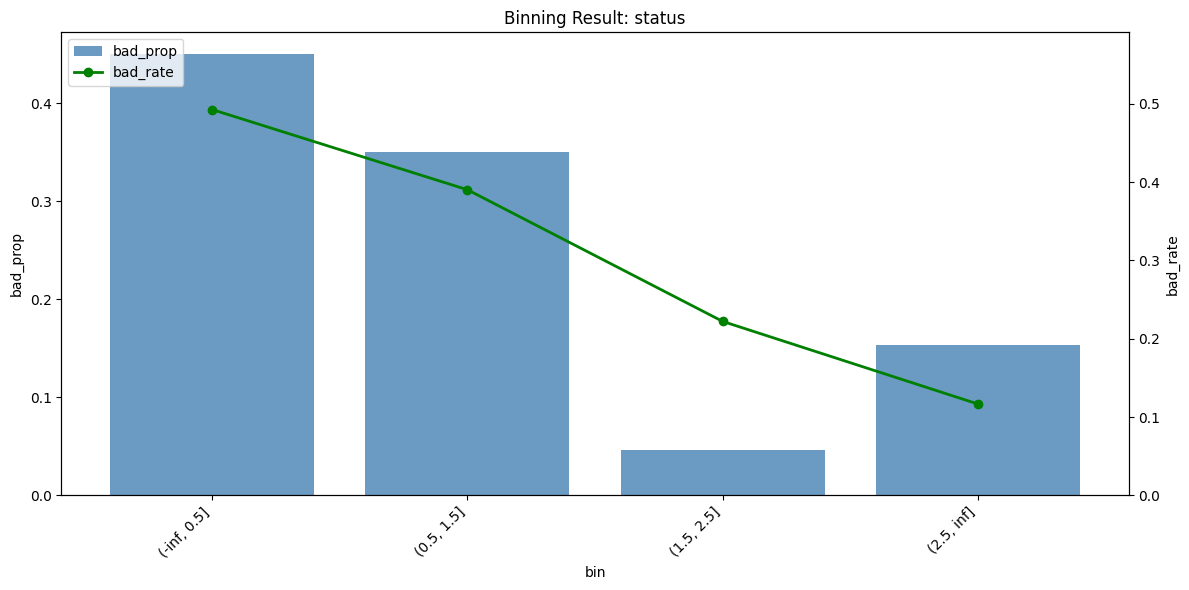

--- Binning Result: duration ---


,bin,min,max,bads,goods,total,bad_rate,good_rate,odds,bad_prop,...,cum_bads,cum_goods,cum_total,cum_bads_prop,cum_goods_prop,cum_total_prop,ks,woe,iv,lift
0,"(-inf, 6.0]",-inf,6.0,9,73,82,0.109756,0.890244,8.111111,0.030000,...,9,73,82,0.030000,0.104286,0.082,0.074286,1.245937,0.092555,0.365854
1,"(6.0, 11.0]",6.0,11.0,18,80,98,0.183673,0.816327,4.444444,0.060000,...,27,153,180,0.090000,0.218571,0.180,0.128571,0.644357,0.034979,0.612245
2,"(11.0, 15.0]",11.0,15.0,62,189,251,0.247012,0.752988,3.048387,0.206667,...,89,342,431,0.296667,0.488571,0.431,0.191905,0.267315,0.016930,0.823373
3,"(15.0, 31.5]",15.0,31.5,128,268,396,0.323232,0.676768,2.093750,0.426667,...,217,610,827,0.723333,0.871429,0.827,0.148095,-0.108341,0.004746,1.077441
4,"(31.5, inf]",31.5,inf,83,90,173,0.479769,0.520231,1.084337,0.276667,...,300,700,1000,1.000000,1.000000,1.000,0.000000,-0.766329,0.113490,1.599229


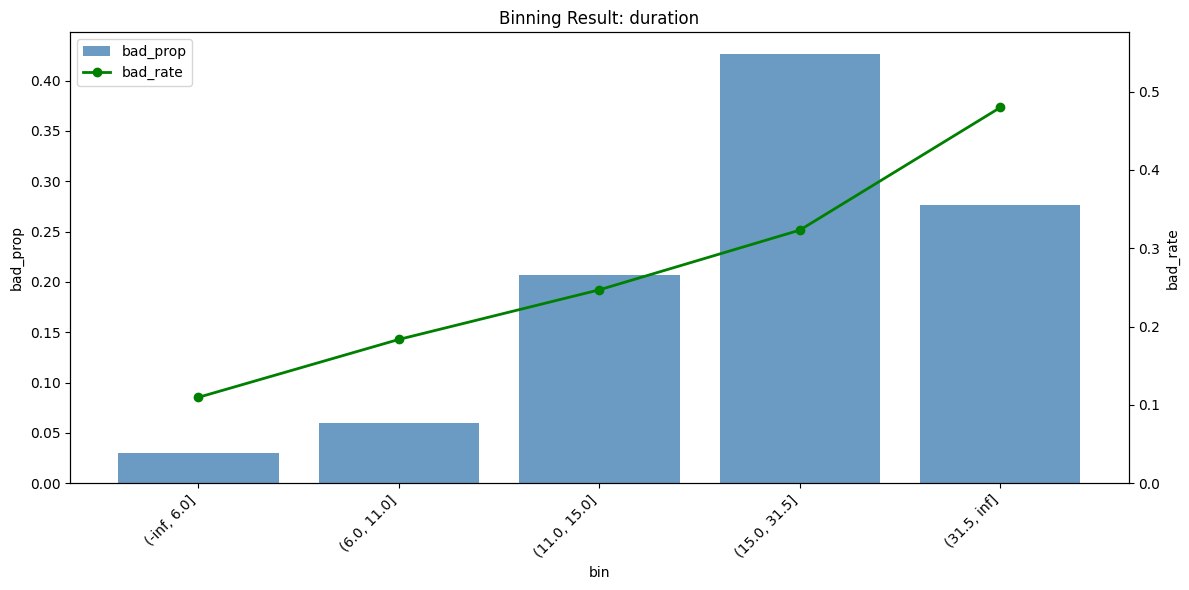

--- Binning Result: credit_history ---


,bin,min,max,bads,goods,total,bad_rate,good_rate,odds,bad_prop,...,cum_bads,cum_goods,cum_total,cum_bads_prop,cum_goods_prop,cum_total_prop,ks,woe,iv,lift
0,"(-inf, 0.5]",-inf,0.5,25,15,40,0.625000,0.375000,0.600000,0.083333,...,25,15,40,0.083333,0.021429,0.040,0.061905,-1.358123,0.084074,2.083333
1,"(0.5, 1.5]",0.5,1.5,28,21,49,0.571429,0.428571,0.750000,0.093333,...,53,36,89,0.176667,0.051429,0.089,0.125238,-1.134980,0.071882,1.904762
2,"(1.5, 2.5]",1.5,2.5,169,361,530,0.318868,0.681132,2.136095,0.563333,...,222,397,619,0.740000,0.567143,0.619,0.172857,-0.088319,0.004206,1.062893
3,"(2.5, 3.5]",2.5,3.5,28,60,88,0.318182,0.681818,2.142857,0.093333,...,250,457,707,0.833333,0.652857,0.707,0.180476,-0.085158,0.000649,1.060606
4,"(3.5, inf]",3.5,inf,50,243,293,0.170648,0.829352,4.860000,0.166667,...,300,700,1000,1.000000,1.000000,1.000,0.000000,0.733741,0.132423,0.568828


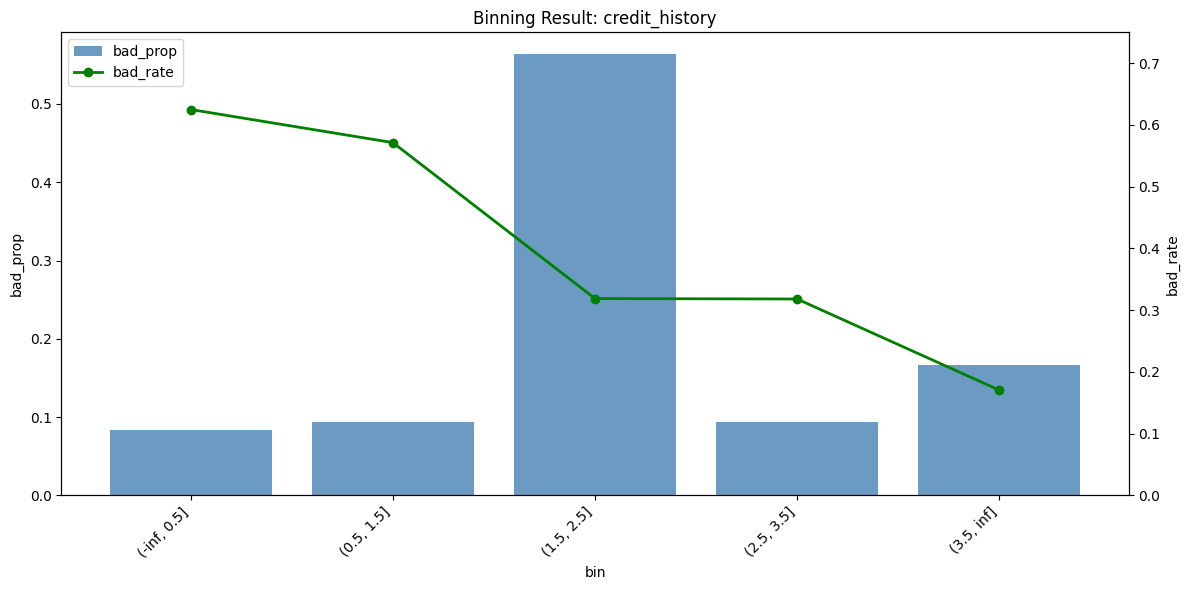

--- Binning Result: purpose ---


,bin,min,max,bads,goods,total,bad_rate,good_rate,odds,bad_prop,...,cum_bads,cum_goods,cum_total,cum_bads_prop,cum_goods_prop,cum_total_prop,ks,woe,iv,lift
0,"(-inf, 0.5]",-inf,0.5,89,145,234,0.380342,0.619658,1.629213,0.296667,...,89,145,234,0.296667,0.207143,0.234,0.089524,-0.359200,0.032157,1.267806
1,"(0.5, inf]",0.5,inf,211,555,766,0.275457,0.724543,2.630332,0.703333,...,300,700,1000,1.000000,1.000000,1.000,0.000000,0.119812,0.010726,0.918190


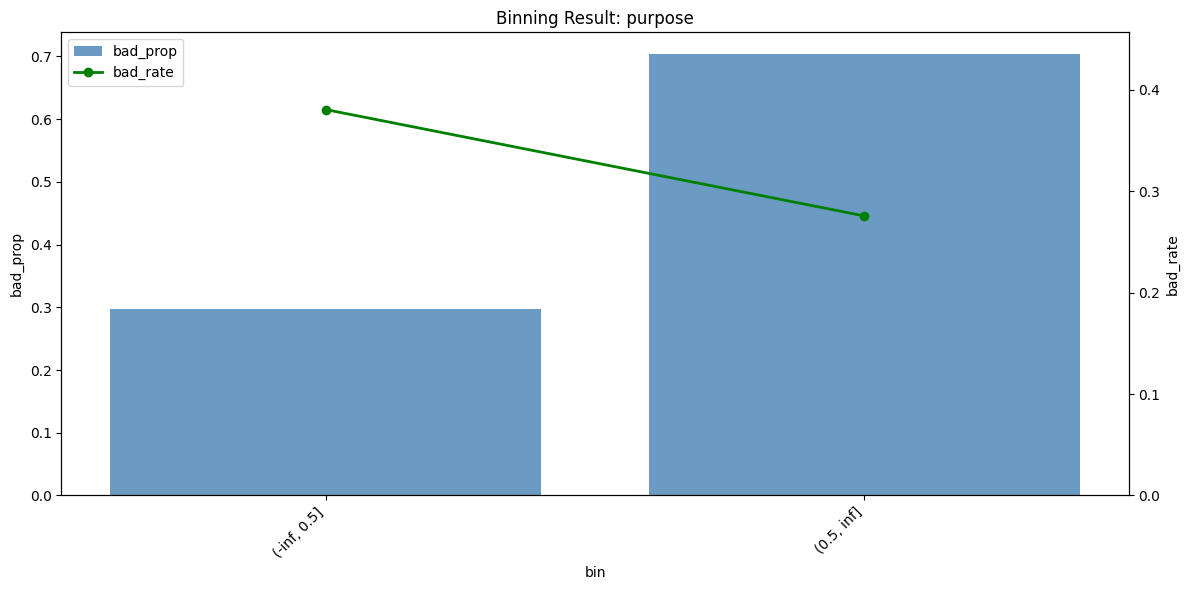

--- Binning Result: savings ---


,bin,min,max,bads,goods,total,bad_rate,good_rate,odds,bad_prop,...,cum_bads,cum_goods,cum_total,cum_bads_prop,cum_goods_prop,cum_total_prop,ks,woe,iv,lift
0,"(-inf, 0.5]",-inf,0.5,217,386,603,0.359867,0.640133,1.778802,0.723333,...,217,386,603,0.723333,0.551429,0.603,0.171905,-0.271358,0.046648,1.199558
1,"(0.5, 1.5]",0.5,1.5,34,69,103,0.330097,0.669903,2.029412,0.113333,...,251,455,706,0.836667,0.650000,0.706,0.186667,-0.139552,0.002060,1.100324
2,"(1.5, 2.5]",1.5,2.5,11,52,63,0.174603,0.825397,4.727273,0.036667,...,262,507,769,0.873333,0.724286,0.769,0.149048,0.706051,0.026561,0.582011
3,"(2.5, inf]",2.5,inf,38,193,231,0.164502,0.835498,5.078947,0.126667,...,300,700,1000,1.000000,1.000000,1.000,0.000000,0.777806,0.115930,0.548341


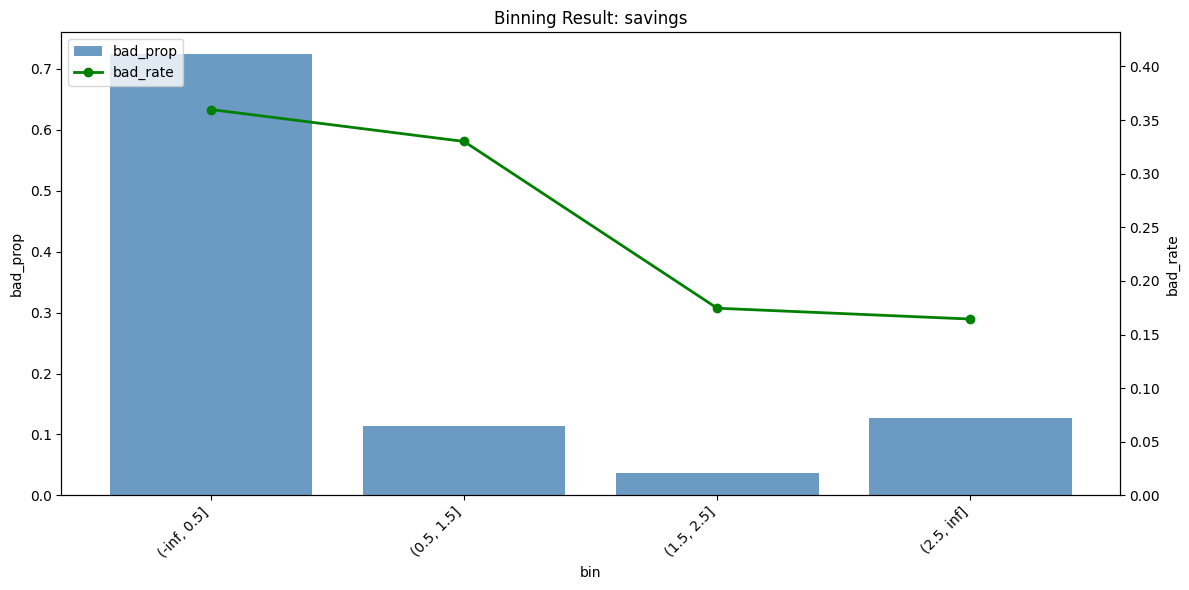

--- Binning Result: property ---


,bin,min,max,bads,goods,total,bad_rate,good_rate,odds,bad_prop,...,cum_bads,cum_goods,cum_total,cum_bads_prop,cum_goods_prop,cum_total_prop,ks,woe,iv,lift
0,"(-inf, 0.5]",-inf,0.5,60,222,282,0.212766,0.787234,3.700000,0.200000,...,60,222,282,0.200000,0.317143,0.282,0.117143,0.461035,0.054007,0.709220
1,"(0.5, 1.5]",0.5,1.5,71,161,232,0.306034,0.693966,2.267606,0.236667,...,131,383,514,0.436667,0.547143,0.514,0.110476,-0.028573,0.000190,1.020115
2,"(1.5, 2.5]",1.5,2.5,102,230,332,0.307229,0.692771,2.254902,0.340000,...,233,613,846,0.776667,0.875714,0.846,0.099048,-0.034191,0.000391,1.024096
3,"(2.5, inf]",2.5,inf,67,87,154,0.435065,0.564935,1.298507,0.223333,...,300,700,1000,1.000000,1.000000,1.000,0.000000,-0.586082,0.058050,1.450216


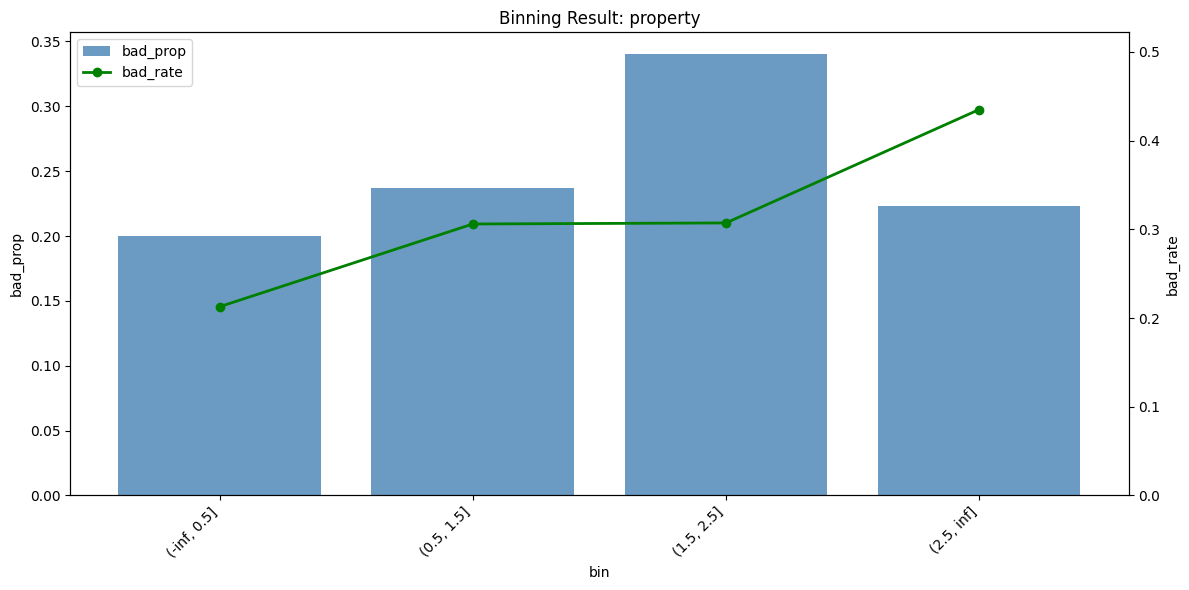

--- Binning Result: age ---


,bin,min,max,bads,goods,total,bad_rate,good_rate,odds,bad_prop,...,cum_bads,cum_goods,cum_total,cum_bads_prop,cum_goods_prop,cum_total_prop,ks,woe,iv,lift
0,"(-inf, 22.5]",-inf,22.5,22,35,57,0.385965,0.614035,1.590909,0.073333,...,22,35,57,0.073333,0.050000,0.057,0.023333,-0.382992,0.008936,1.286550
1,"(22.5, 30.5]",22.5,30.5,126,228,354,0.355932,0.644068,1.809524,0.420000,...,148,263,411,0.493333,0.375714,0.411,0.117619,-0.254234,0.023971,1.186441
2,"(30.5, 44.0]",30.5,44.0,102,286,388,0.262887,0.737113,2.803922,0.340000,...,250,549,799,0.833333,0.784286,0.799,0.049048,0.183721,0.012598,0.876289
3,"(44.0, inf]",44.0,inf,50,151,201,0.248756,0.751244,3.020000,0.166667,...,300,700,1000,1.000000,1.000000,1.000,0.000000,0.257959,0.012652,0.829187


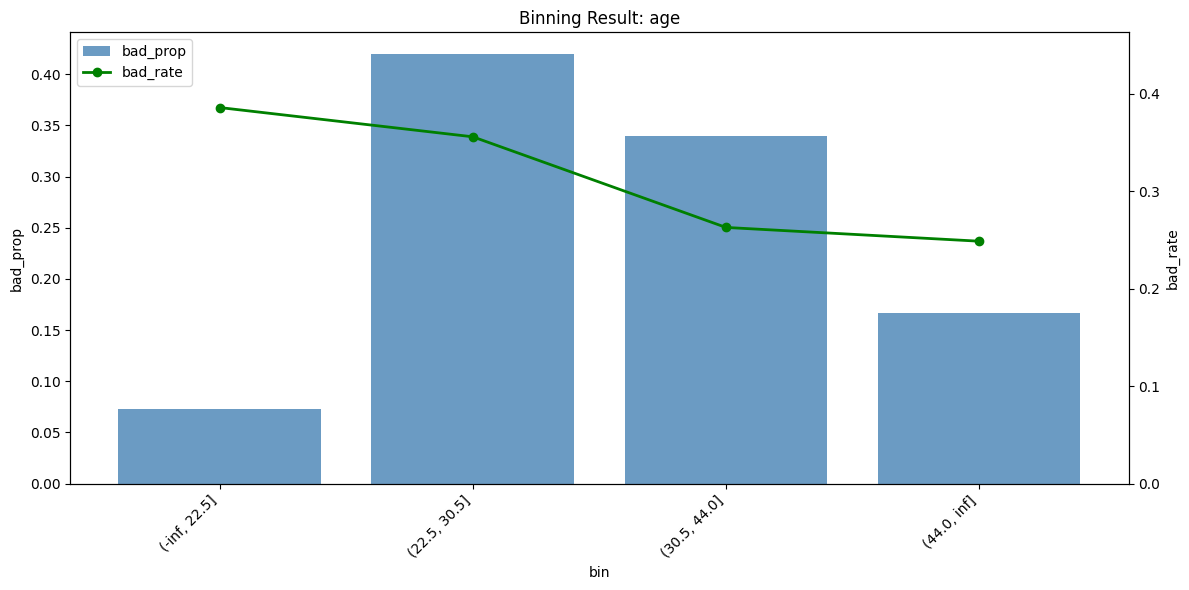

In [17]:
binner.stats_plot()

In [18]:
# binner['status'].plot(y='total')

In [19]:
# binner['status'].woe_map()

In [57]:
binner.rules_

{'status': [0.5, 1.5, 2.5],
 'duration': [6.0, 11.0, 15.0, 31.5],
 'credit_history': [0.5, 1.5, 2.5, 3.5],
 'purpose': [0.5],
 'savings': [0.5, 1.5, 2.5],
 'property': [0.5, 1.5, 2.5],
 'age': [22.5, 30.5, 44.0]}

In [20]:
# binner

In [23]:
X_woe = binner.woe_transform(df_encoded[s_fea_list])

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X_woe, df['target'], test_size=0.2, random_state=42)

In [27]:
postfilter = newt.PostFilter()
X_woe = postfilter.fit_transform(X_train, X_test)

In [31]:
postfilter.report()['summary']

,feature,psi,vif,status,reason
0,purpose,0.000000,1.037445,selected,
1,property,0.002167,1.071787,selected,
2,credit_history,0.003145,1.079407,selected,
3,status,0.005201,1.124830,selected,
4,age,0.010288,1.056162,selected,
5,savings,0.015454,1.054683,selected,
6,duration,0.017206,1.086253,selected,


In [33]:
model = newt.LogisticModel()
model.fit(X_train, y_train)
print(model.summary())

                           Logit Regression Results                           
Dep. Variable:                 target   No. Observations:                  800
Model:                          Logit   Df Residuals:                      792
Method:                           MLE   Df Model:                            7
Date:                Thu, 08 Jan 2026   Pseudo R-squ.:                  0.1984
Time:                        10:39:49   Log-Likelihood:                -392.43
converged:                       True   LL-Null:                       -489.54
Covariance Type:            nonrobust   LLR p-value:                 1.924e-38
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.8484      0.090     -9.421      0.000      -1.025      -0.672
status            -0.7148      0.111     -6.450      0.000      -0.932      -0.498
duration          -0.8829      0.187

In [62]:
model.result_

In [45]:
newt.calculate_auc(y_test,model.predict_proba(X_test))

0.8146411828344754

In [46]:
newt.calculate_ks(y_test,model.predict_proba(X_test))

0.5424930881115518

In [47]:
newt.calculate_lift(y_test,model.predict_proba(X_test))

,bin,min_prob,max_prob,count,events,event_rate,lift
0,9,0.599491,0.853262,20,14,0.70,2.372881
1,8,0.463111,0.599454,20,11,0.55,1.864407
2,7,0.378646,0.456451,20,10,0.50,1.694915
3,6,0.311595,0.374450,20,8,0.40,1.355932
4,5,0.235490,0.310864,20,8,0.40,1.355932
5,4,0.176794,0.225923,20,1,0.05,0.169492
6,3,0.140758,0.176271,20,6,0.30,1.016949
7,2,0.109764,0.138209,20,1,0.05,0.169492
8,1,0.066527,0.102773,20,0,0.00,0.000000
9,0,0.015936,0.060013,20,0,0.00,0.000000


In [37]:
scorecard = newt.Scorecard(base_score=600, pdo=50, base_odds=1/100)
scorecard.from_model(model, binner, binner.woe_encoders_)
print(scorecard.summary())

Scorecard Summary
Base Score: 600
PDO: 50
Base Odds: 0.0100
Factor: 72.1348
Offset: 932.1928
Intercept Points: 993.39
Number of Features: 7
--------------------------------------------------
Features:
  status: 4 bins, points range [-42.2, 60.7]
  duration: 5 bins, points range [-48.8, 79.4]
  credit_history: 5 bins, points range [-78.5, 42.4]
  purpose: 2 bins, points range [-44.2, 14.7]
  savings: 4 bins, points range [-11.7, 33.4]
  property: 4 bins, points range [-35.3, 27.8]
  age: 4 bins, points range [-33.7, 22.7]


In [58]:
scorecard.export()

,feature,bin,woe,points
0,Intercept,-,0.000000,993.390830
1,status,"(-inf, 0.5]",-0.818099,-42.182897
2,status,"(0.5, 1.5]",-0.401392,-20.696608
3,status,"(1.5, 2.5]",0.405465,20.906637
4,status,"(2.5, inf]",1.176263,60.650616
5,duration,"(-inf, 6.0]",1.245937,79.350126
6,duration,"(11.0, 15.0]",0.267315,17.024505
7,duration,"(15.0, 31.5]",-0.108341,-6.899934
8,duration,"(31.5, inf]",-0.766329,-48.805266
9,duration,"(6.0, 11.0]",0.644357,41.037236
